In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [6]:
def getDF(code):
    path = os.getcwd() + "\Datasets\\"
    newPath = path + code
    df = pd.read_csv(newPath + "\\" + os.listdir(newPath)[0])
    return df

In [3]:
def finding_PercentageMissing(df,n):
    percent_missing = df.isnull().sum() * 100/len(df)
    missing_value_df = pd.DataFrame({'column_name': df.columns,
                                    'percent missing': percent_missing})
    rslt_df = missing_value_df[missing_value_df['percent_missing']>n]
    return rslt_df

In [7]:
lowest = getDF("SI.DST.FRST.10")
highest = getDF("SI.DST.10TH.10")
GDPPCG = getDF("NY.GDP.PCAP.KD.ZG")

In [8]:
toDrop = [str(i) for i in range(1960,2000)]
toDrop.append('2019')
lowest = lowest.drop(toDrop, axis =1)
highest = highest.drop(toDrop, axis =1)
GDPPCG = GDPPCG.drop(toDrop, axis =1)

In [9]:
hAvg = np.array(highest.mean(axis=1))
lAvg = np.array(lowest.mean(axis=1))
highest["Avg"] = hAvg
lowest["Avg"] = lAvg
highest = highest.sort_values(by = ['Avg'],ascending=False)
lowest = lowest.sort_values(by = ['Avg'])

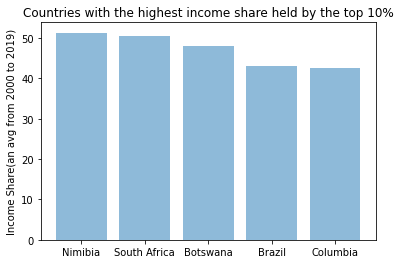

In [14]:
#Plotting 5 Countries with the Highest top 10%
x_h = ['Nimibia','South Africa','Botswana','Brazil','Columbia']
y_pos_h = np.arange(len(x_h))
y_h = [51.300000, 50.440000, 48.066667, 43.147059,42.529412]
plt.bar(y_pos_h, y_h, align='center',alpha = 0.5)
plt.xticks(y_pos_h, x_h)
plt.ylabel('Income Share(an avg from 2000 to 2019)')
plt.title('Countries with the highest income share held by the top 10%')
plt.show()

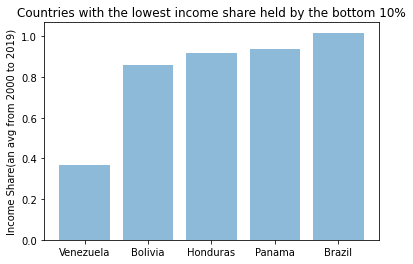

In [13]:
#Plotting 5 Countries with the lowest bottom 10%
x_l = ['Venezuela','Bolivia','Honduras','Panama','Brazil']
y_pos_l = np.arange(len(x_l))
y_l = [0.366667, 0.859050, 0.916667, 0.936842, 1.017910]
plt.bar(y_pos_l, y_l, align='center',alpha = 0.5)
plt.xticks(y_pos_l, x_l)
plt.ylabel('Income Share(an avg from 2000 to 2019)')
plt.title('Countries with the lowest income share held by the bottom 10%')
plt.show()

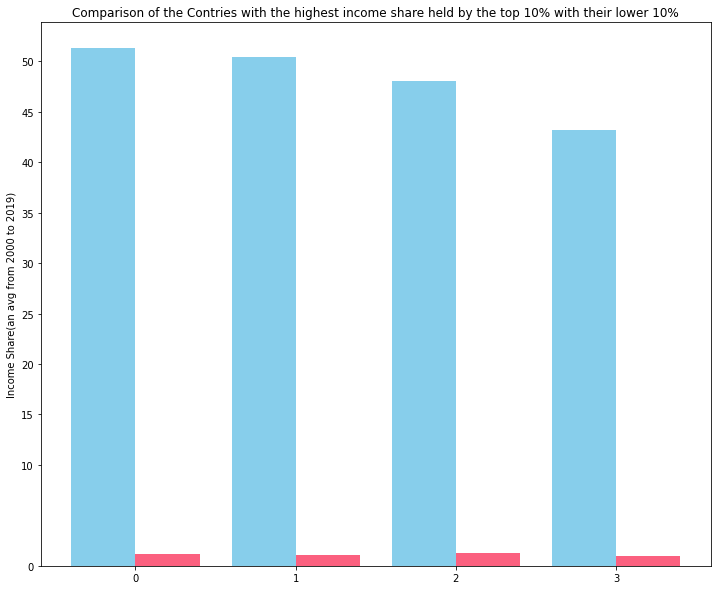

In [27]:
#Comparing the top and bottom 10% of the countries with the Highest Top 10%
x_c = ['Nimibia','South Africa','Botswana','Brazil']
y_c1 = [1.133333,1.041281, 1.21901,1.01791]
y_c2 = [51.300000, 50.440000, 48.066667, 43.147059]
fig, ax = plt.subplots(figsize=(12,10))
y_pos_c = np.arange(len(x_c))
bar_width = 0.4
b1 = ax.bar(y_pos_c,y_c2, width = bar_width, color = "#87ceeb")
b2 = ax.bar(y_pos_c + bar_width,y_c1, width = bar_width, color = "#fb607f")
ax.set_xticks(y_pos_c + bar_width / 2)
ax.set_xticklabels(y_pos_c)
ax.set_yticks([0,10,15,20,25,30,35,40,45,50])
plt.ylabel('Income Share(an avg from 2000 to 2019)')
plt.title('Comparison of the Contries with the highest income share held by the top 10% with their lower 10%')
plt.show()

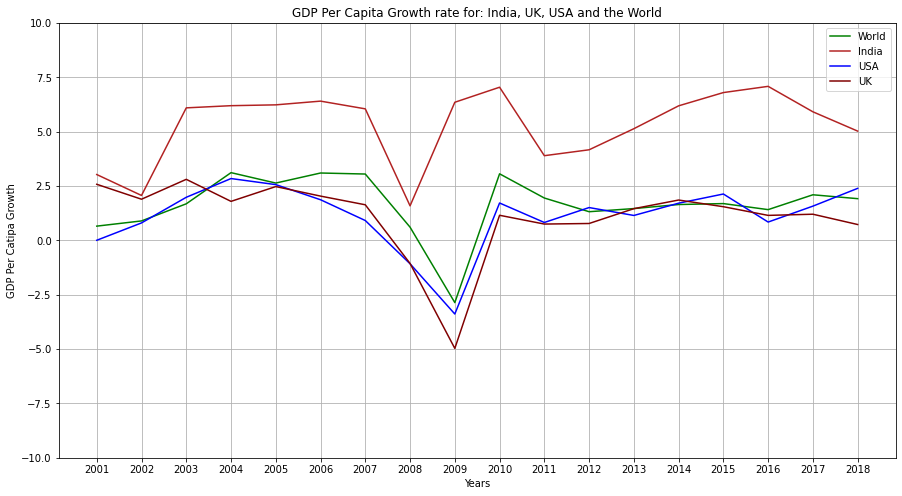

In [23]:
#Comparing the GDP Per Capita Growth rate for: India, UK, USA and the World
WorldGDP = GDPPCG[GDPPCG["Country Name"]=="World"]
IndiaGDP = GDPPCG[GDPPCG["Country Name"]=="India"]
USAGDP = GDPPCG[GDPPCG["Country Name"]=="United States"]
UKGDP = GDPPCG[GDPPCG["Country Name"]=="United Kingdom"]

World = {}
India = {}
USA = {}
UK = {}

k = 5
for i in WorldGDP.iloc[:,5:]:
    World[int(i)] = WorldGDP.iloc[0,k]
    India[int(i)] = IndiaGDP.iloc[0,k]
    USA[int(i)] = USAGDP.iloc[0,k]
    UK[int(i)] = UKGDP.iloc[0,k]
    k+=1
plt.figure(figsize=(15,8))
plt.grid(True)
plt.title("GDP Per Capita Growth rate for: India, UK, USA and the World")
plt.xlabel("Years")
plt.ylabel("GDP Per Catipa Growth")
plt.ylim(-10,10)
plt.xticks(range(2000, 2019))
plt.plot(np.array(list(World.keys())),np.array(list(World.values())), color = "Green")
plt.plot(np.array(list(India.keys())),np.array(list(India.values())), color = "#B22222")
plt.plot(np.array(list(USA.keys())),np.array(list(USA.values())), color = "Blue")
plt.plot(np.array(list(UK.keys())),np.array(list(UK.values())), color = "#800000")
plt.legend(["World","India","USA","UK"])
plt.show()